In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.gray()

<Figure size 640x480 with 0 Axes>

plt.imshow(train_images[2])

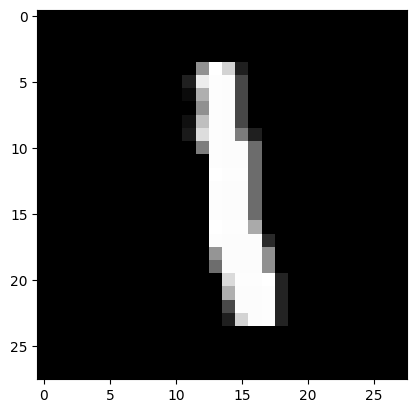

In [9]:
plt.imshow(train_images[6])

In [10]:
train_labels[6]

1

In [11]:
from tensorflow.keras import layers, models

# Create a Sequential model
model_cnn = models.Sequential()



In [12]:
# Add the first convolutional layer with input shape
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

c:\Users\spoor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model_cnn.add(layers.MaxPooling2D(2,2))

In [14]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [15]:
model_cnn.add(layers.MaxPooling2D(2,2))

In [16]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

In [17]:
model_cnn.add(layers.Flatten())

In [18]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

In [19]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [20]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [23]:
train_images_cnn.shape

(60000, 28, 28, 1)

In [24]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [25]:
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [26]:
test_images_cnn = test_images_cnn.astype('float32') / 255

In [27]:
from keras.utils import to_categorical

In [28]:
train_labels_cnn = to_categorical(train_labels)

In [29]:
test_labels_cnn = to_categorical(test_labels)

In [30]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 12, batch_size = 60)

Epoch 1/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 9.4905e-09
Epoch 2/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 1.0385e-08
Epoch 3/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 1.1306e-08
Epoch 4/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 9.1896e-09
Epoch 5/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 8.9125e-09
Epoch 6/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 9.8793e-09
Epoch 7/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 9.4312e-09
Epoch 8/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 9.2664e-09
Epoch 9/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 1.0000 - loss: 1.0111e-08
Epoch 10/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 1.0000 - loss: 9.6783e-09
Epoch 11/12
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - 

In [51]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0998


In [53]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.3399977684021


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 5


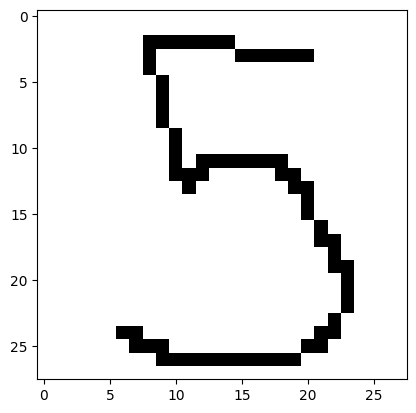

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your input image
image_name = 'digits/5.png'  # Set the path to your image file
img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
img = np.invert(img)
img = np.expand_dims(img, axis=-1)  # Add an extra dimension for the channel
img = img.reshape(1, 28, 28, 1)  # Reshape the input image to match the model's input shape

# Perform prediction
prediction = model_cnn.predict(img)
predicted_digit = np.argmax(prediction)
print(f'This digit is probably a {predicted_digit}')

# Display the input image
plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
plt.show()


In [49]:
from keras.models import load_model
model_cnn.save('mnist_model_1.keras')